<hr style="border: solid 3px blue;">

# Vectorizing Language


![](https://miro.medium.com/max/600/1*UCKRYEj85S3eH1uv1vFfCw.gif)

Picture credit: https://miro.medium.com

## What is word embedding?
> In natural language processing (NLP), word embedding is a term used for the representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning.Word embeddings can be obtained using a set of language modeling and feature learning techniques where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves the mathematical embedding from space with many dimensions per word to a continuous vector space with a much lower dimension.
> 
> Methods to generate this mapping include neural networks,dimensionality reduction on the word co-occurrence matrix,probabilistic models, explainable knowledge base method, and explicit representation in terms of the context in which words appear.
> 
> Word and phrase embeddings, when used as the underlying input representation, have been shown to boost the performance in NLP tasks such as syntactic parsing and sentiment analysis.

Ref: https://en.wikipedia.org/wiki/Word_embedding

In [1]:
try:
    import pycaret
except:
    !pip install pycaret

try:
    import missingno
except:
    !pip install missingno

     |████████████████████████████████| 301 kB 288 kB/s            
     |████████████████████████████████| 10.4 MB 48 kB/s             
     |████████████████████████████████| 636 kB 41.3 MB/s            
     |████████████████████████████████| 24.2 MB 942 kB/s             
     |████████████████████████████████| 167 kB 45.9 MB/s            
     |████████████████████████████████| 114 kB 44.0 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 25.9 MB 830 kB/s             
     |████████████████████████████████| 15.6 MB 656 kB/s             
     |████████████████████████████████| 184 kB 29.8 MB/s            
     |████████████████████████████████| 1.0 MB 56.1 MB/s            
     |████████████████████████████████| 14.8 MB 53.3 MB/s            
     |████████████████████████████████| 58 kB 3.2 MB/s             
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 79 kB 5.1 MB/s             
  Created wh

--------------------------------------
# Setting Up

In [2]:
import numpy as np
import pandas as pd
import spacy

import warnings
warnings.filterwarnings(action='ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

![](https://spacy.io/architecture-415624fc7d149ec03f2736c4aa8b8f3c.svg)

Picture Credit: https://spacy.io

In [3]:
!python -m spacy download en_core_web_sm
!python -m textblob.download_corpora

     |████████████████████████████████| 12.0 MB 514 kB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047105 sha256=1c431a700604847acc458cb3b6030e05e15044b894d3fe098283f759bab86985
  Stored in directory: /root/.cache/pip/wheels/b7/0d/f0/7ecae8427c515065d75410989e15e5785dd3975fe06e795cd9
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.2.0
    Uninstalling en-core-web-sm-3.2.0:
      Successfully uninstalled en-core-web-sm-3.2.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[nltk_data] Downloading package brown to /usr/share/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_da

In [4]:
import spacy
# Load the large model to get the vectors
nlp = spacy.load('en_core_web_sm')

-----------------------------------------------------
# EDA

In [5]:
review_data = pd.read_csv('../input/nlp-course/yelp_ratings.csv')
review_data.head()

,text,stars,sentiment
0,Total bill for this horrible service? Over $8G...,1.0,0
1,I *adore* Travis at the Hard Rock's new Kelly ...,5.0,1
2,I have to say that this office really has it t...,5.0,1
3,Went in for a lunch. Steak sandwich was delici...,5.0,1
4,Today was my second out of three sessions I ha...,1.0,0


<span style="color:Blue"> Observation:
* This dataset is related to restaurant reviews.

In [6]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44530 entries, 0 to 44529
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       44530 non-null  object 
 1   stars      44530 non-null  float64
 2   sentiment  44530 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.0+ MB


<span style="color:Blue"> Observation:
* There are two features.

In [7]:
fig = px.histogram(review_data, x='stars',
                   color="sentiment", 
                   marginal="box",
                   barmode ="overlay",
                   histnorm ='density'
                  )  
fig.update_layout(
    title_font_color="white",
    legend_title_font_color="yellow",
    title={
        'text': "stars histogram",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white"
)
fig.show()

<span style="color:Blue"> Observation:
* If the level of the stars feature is 1,2, the target is determined to be negative (0).
* If the level of the stars feature is 4,5, the target is determined as positive(1).
    
Data leakage is observed.

-----------------------------------------------
# What is Data Leakage?

![](https://miro.medium.com/max/1400/1*EqL_vBHR7tovnaagA0qC1Q.jpeg)

Picture Credit: https://miro.medium.com

> In statistics and machine learning, leakage (also known as data leakage or target leakage) is the use of information in the model training process which would not be expected to be available at prediction time, causing the predictive scores (metrics) to overestimate the model's utility when run in a production environment.
> 
> Leakage is often subtle and indirect, making it hard to detect and eliminate. Leakage can cause a statistician or modeler to select a suboptimal model, which could be outperformed by a leakage-free model.

> **Feature leakage**
> 
> Feature or column-wise leakage is caused by the inclusion of columns which are one of the following: a duplicate label, a proxy for the label, or the label itself. These features, known as anachronisms, will not be available when the model is used for predictions, and result in leakage if included when the model is trained.
> 
> For example, including a "MonthlySalary" column when predicting "YearlySalary"; or "MinutesLate" when predicting "IsLate"; or more subtly "NumOfLatePayments" when predicting "ShouldGiveLoan"

Ref: https://en.wikipedia.org/wiki/Leakage_(machine_learning)

Data leakage can be seen as equivalent to cheating. In other words, when information about the target is introduced for some reason when learning the model and the target can be predicted very easily using this information, we can determine that data leakage has occurred.

When data leakage occurs, it does not help model learning, even if it makes good performance during training. Our model does not focus on meaningful features, and will take the easy way.

The data leakage type of this dataset can be considered as feature leakage. We boldly decide to dorp the stars feature.

In [8]:
review_data.drop('stars',axis=1,inplace=True)

--------------------------------------
![](https://spacy.io/pipeline-fde48da9b43661abcdf62ab70a546d71.svg)

> The processing pipeline consists of one or more pipeline components that are called on the Doc in order. The tokenizer runs before the components. Pipeline components can be added using Language.add_pipe. They can contain a statistical model and trained weights, or only make rule-based modifications to the Doc. spaCy provides a range of built-in components for different language processing tasks and also allows adding custom components.

Credit: https://spacy.io

In this case, ohter modules in the pipeline is turned off except vector.

In [9]:
reviews = review_data.sample(5000, random_state=786).reset_index(drop=True)
# We just want the vectors so we can turn off other models in the pipeline
with nlp.disable_pipes():
    vectors = np.array([nlp(review.text).vector for idx, review in reviews.iterrows()])
    
vectors.shape

(5000, 96)

In [10]:
colors = ['gold', 'mediumturquoise']
labels = ['Negative','Positive']
values = reviews['sentiment'].value_counts()/reviews['sentiment'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Target Balance",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

<span style="color:Blue"> Observation:
* Target cannot be regarded as imblanced.

-----------------------------------------
# Visualizing the document vectors

<AxesSubplot:>

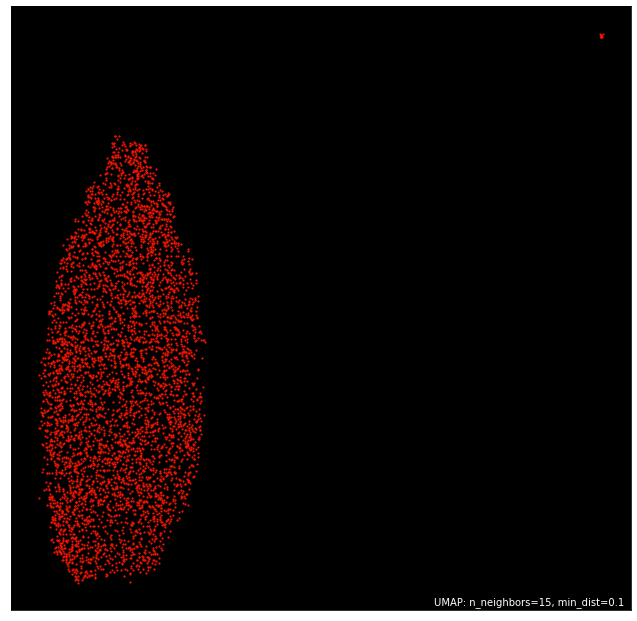

In [11]:
import umap
import umap.plot
mapper = umap.UMAP().fit(vectors) 
umap.plot.points(mapper, theme='fire')

In [12]:
from umap import UMAP
import plotly.express as px

umap_3d = UMAP(n_components=3, init='random', random_state=0)
x_umap = umap_3d.fit_transform(vectors)
fig = px.scatter_3d(
    x_umap, x=0, y=1, z=2    
)
fig.update_traces(marker_size=1.5)
fig.show()

The above figure is drawn in 3D after reducing the dimension through UMAP of document vectors. It is not an exact document vector because it is a dimensionality reduction and cannot draw 96 dimensions, but each point above was drawn to explain the process of mapping a document into a vector space.

<hr style="border: solid 3px blue;">

# NLP Text Classification using PyCaret


In [13]:
from pycaret.nlp import *
%time 
fake_news_nlp = setup(data = reviews, target = 'text', session_id = 123)

Description,Value
session_id,123
Documents,5000
Vocab Size,11482
Custom Stopwords,False


<span style="color:Blue"> Observation:
* A vocabulary of size 11482 was created.

----------------------------------------
## Latent Dirichlet allocation

![](https://ars.els-cdn.com/content/image/1-s2.0-S0164121218302103-gr6.jpg)

Picture Credit: https://ars.els-cdn.com

> In natural language processing, the latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics. LDA is an example of a topic model.

Ref: https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

In [14]:
%time 
lda = create_model('lda',multi_core=True)

In [15]:
%time 
lda_df = assign_model(lda)

In [16]:
lda_df.head()

,text,sentiment,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,see plan tat many month give concept idea run ...,1,0.605494,0.196599,0.011542,0.186366,Topic 0,0.61
1,ask driver good hole_wall type place eat think...,1,0.073768,0.002407,0.864694,0.059132,Topic 2,0.86
2,always good choice quality food tend busy dinn...,1,0.003746,0.003798,0.962521,0.029935,Topic 2,0.96
3,joint entire world thus far discover place vis...,1,0.083107,0.155237,0.758881,0.002775,Topic 2,0.76
4,maybe order wrong thing thoroughly unimpressed...,0,0.137598,0.002562,0.809750,0.050090,Topic 2,0.81


In [17]:
plot_model(lda, plot = 'topic_distribution')

<span style="color:Blue"> Observation:
* Divided into 4 topics.
* Most of the documents were classified into Topic 2.
* In Topic 2, there are food, good, place, order, go, great, come, get, service, try keywords.    

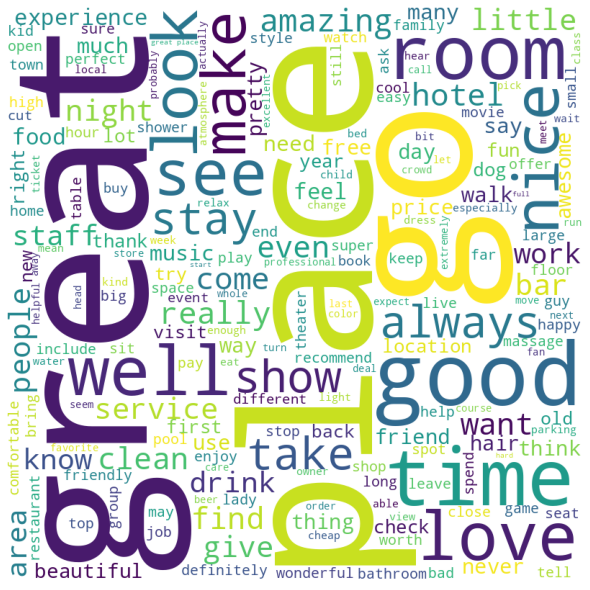

In [18]:
plot_model(lda, plot = 'wordcloud')

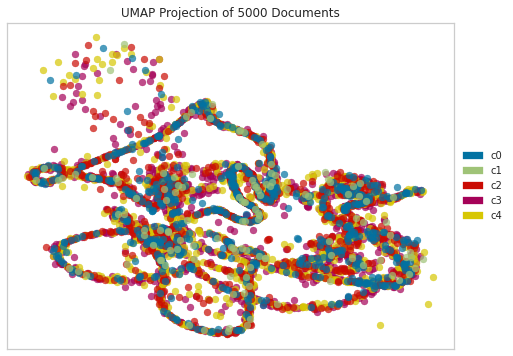

In [19]:
plot_model(lda, plot = 'umap')

In [20]:
plot_model(lda, plot = 'tsne')

In [21]:
plot_model(lda, plot = 'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.138011 -0.096310       1        1  43.976616
3     -0.107204  0.131989       2        1  33.823845
0      0.067814 -0.121955       3        1  16.241235
1      0.177400  0.086275       4        1   5.958304, topic_info=      Term         Freq        Total Category  logprob  loglift
50    food  2176.000000  2176.000000  Default  30.0000  30.0000
5    great  2013.000000  2013.000000  Default  29.0000  29.0000
8     love   897.000000   897.000000  Default  28.0000  28.0000
279   call   633.000000   633.000000  Default  27.0000  27.0000
244   room   386.000000   386.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
54    good    44.078394  2812.318682   Topic4  -5.6556  -1.3354
9     many    34.863032   412.784135   Topic4  -5.8902   0.3489
96     try    37.092382  1154.875804   Topic4  -5.8282  -0.6180
79   place    38.059471  2405.336555   Topic4  -5.8024  -1.3259
128  price    34.632524   667.326479   Topic4  -5.8968  -0.1381

[311 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
545       2  0.975847       act
1159      3  0.972364  activity
24        1  0.511264      also
24        2  0.250172      also
24        3  0.170752      also
...     ...       ...       ...
207       1  0.399004     would
207       2  0.491506     would
207       3  0.104928     would
207       4  0.004832     would
6145      4  0.919480      yoga

[535 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

----------------------------------------------
# What is n-gram?

> In the fields of computational linguistics and probability, an n-gram (sometimes also called Q-gram) is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus. When the items are words, n-grams may also be called shingles.
> 
> Using Latin numerical prefixes, an n-gram of size 1 is referred to as a "unigram"; size 2 is a "bigram" (or, less commonly, a "digram"); size 3 is a "trigram". English cardinal numbers are sometimes used, e.g., "four-gram", "five-gram", and so on. In computational biology, a polymer or oligomer of a known size is called a k-mer instead of an n-gram, with specific names using Greek numerical prefixes such as "monomer", "dimer", "trimer", "tetramer", "pentamer", etc., or English cardinal numbers, "one-mer", "two-mer", "three-mer", etc.

In [22]:
plot_model(lda, plot = 'bigram')

<span style="color:Blue"> Observation:
* There were many bigrams such as 'great place', 'go back', 'make sure', and 'love place'.

In [23]:
plot_model(lda, plot = 'trigram')

<span style="color:Blue"> Observation:
* There are relatively many trigrams such as 'staff friendly helpful' and 'would definitely recommended'.

<hr style="border: solid 3px blue;">

# Modeling

![](https://9q6pu33arq33jokx6qglbp6n-wpengine.netdna-ssl.com/wp-content/uploads/2018/04/3049155-poster-p-1-machine-learning-is-just-a-big-game-of-plinko.gif)

Picture Credit: https://9q6pu33arq33jokx6qglbp6n-wpengine.netdna-ssl.com

So far, we have changed text to vector through NLP process, and topic modeling document using LDA. After that, the results of NLP were interpreted with various plots.

Here, we would like to model the dataset transformed through the above process and analyze it.

We did topic modeling of text features with LDA. Since the information about the text feature has already been embedded, let's remove it.

In [24]:
lda_df.drop('text',axis=1,inplace=True)

----------------------------------
## Setting Up

In [25]:
from pycaret.classification import *

In [26]:
%time 
setup(data = lda_df, 
      target = 'sentiment',
      silent = True)

,Description,Value
0,session_id,5278
1,Target,sentiment
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5000, 7)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


('e9ad',
 False,
 None,
 <MLUsecase.CLASSIFICATION: 1>,
 False,
 [],
 10,
       sentiment   Topic_0   Topic_1   Topic_2   Topic_3 Dominant_Topic  \
 0             1  0.605494  0.196599  0.011542  0.186366        Topic 0   
 1             1  0.073768  0.002407  0.864694  0.059132        Topic 2   
 2             1  0.003746  0.003798  0.962521  0.029935        Topic 2   
 3             1  0.083107  0.155237  0.758881  0.002775        Topic 2   
 4             0  0.137598  0.002562  0.809750  0.050090        Topic 2   
 ...         ...       ...       ...       ...       ...            ...   
 4995          1  0.013185  0.013004  0.960313  0.013499        Topic 2   
 4996          1  0.018704  0.150890  0.811459  0.018947        Topic 2   
 4997          1  0.004596  0.286067  0.286681  0.422656        Topic 3   
 4998          1  0.234418  0.002036  0.086498  0.677048        Topic 3   
 4999          1  0.003005  0.002969  0.927253  0.066773        Topic 2   
 
       Perc_Dominant_Top

----------------------------------
## Comparing Models

In [27]:
%time 
compare_models(sort='Accuracy', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7805,0.7737,0.9238,0.8073,0.8615,0.3426,0.3624,0.2600
ada,Ada Boost Classifier,0.7751,0.7588,0.9188,0.8047,0.8579,0.3289,0.3470,0.1130
catboost,CatBoost Classifier,0.7751,0.7702,0.9173,0.8056,0.8577,0.3309,0.3491,2.3570
lr,Logistic Regression,0.7748,0.7717,0.9026,0.8134,0.8555,0.3503,0.3626,0.2620
ridge,Ridge Classifier,0.7668,0.0000,0.9045,0.8045,0.8514,0.3167,0.3309,0.0110
lda,Linear Discriminant Analysis,0.7668,0.7682,0.8898,0.8126,0.8493,0.3374,0.3461,0.0120
lightgbm,Light Gradient Boosting Machine,0.7657,0.7548,0.8945,0.8089,0.8494,0.3262,0.3358,0.1600
knn,K Neighbors Classifier,0.7648,0.7227,0.8879,0.8119,0.8481,0.3312,0.3383,0.0910
svm,SVM - Linear Kernel,0.7625,0.0000,0.9053,0.8037,0.8487,0.2838,0.3115,0.0130
rf,Random Forest Classifier,0.7548,0.7381,0.8767,0.8082,0.8408,0.3095,0.3158,0.4790


[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=5278, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=5278),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
     

----------------------------------
## Creating Models

In [28]:
catboost = create_model('catboost',verbose = False)
gbc = create_model('gbc',verbose = False)
lr = create_model('lr',verbose = False)

----------------------------------
## Tuning Hyperparameters

In [29]:
tuned_catboost = tune_model(catboost, optimize = 'Accuracy',early_stopping = True)
tuned_gbc = tune_model(gbc, optimize = 'Accuracy',early_stopping = True)
tuned_lr = tune_model(lr, optimize = 'Accuracy',early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7143,0.7203,0.8263,0.7955,0.8106,0.2301,0.2307
1,0.7686,0.7555,0.8958,0.8112,0.8514,0.3345,0.3431
2,0.7829,0.8056,0.8958,0.8256,0.8593,0.3877,0.3939
3,0.7829,0.7702,0.8958,0.8256,0.8593,0.3877,0.3939
4,0.7829,0.7728,0.9421,0.8000,0.8652,0.3250,0.3561
5,0.8000,0.8205,0.9151,0.8316,0.8713,0.4272,0.4372
6,0.8086,0.8016,0.9151,0.8404,0.8762,0.4581,0.4662
7,0.7686,0.7786,0.8760,0.8218,0.8480,0.3651,0.3683
8,0.7800,0.7222,0.8992,0.8198,0.8577,0.3779,0.3859
9,0.7937,0.7806,0.9302,0.8163,0.8696,0.3863,0.4059


--------------------------------------------------
## Interpreting Models

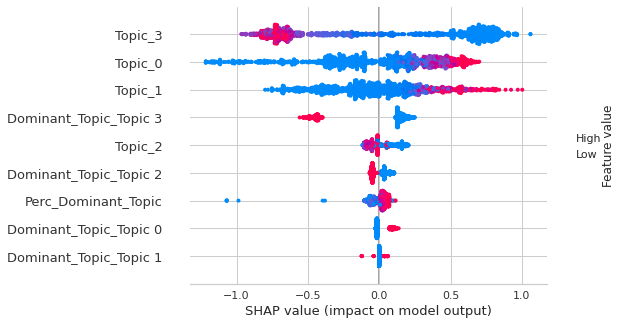

In [30]:
interpret_model(tuned_catboost)

<span style="color:Blue"> Observation:
* Topic_3 is the most important feature in the catboost model.
* Topic_0 is also an important feature in the catboost model.

----------------------------------
## Doing Ensemble

> Ensemble learning is the process by which multiple models, such as classifiers or experts, are strategically generated and combined to solve a particular computational intelligence problem. Ensemble learning is primarily used to improve the (classification, prediction, function approximation, etc.) performance of a model, or reduce the likelihood of an unfortunate selection of a poor one. Other applications of ensemble learning include assigning a confidence to the decision made by the model, selecting optimal (or near optimal) features, data fusion, incremental learning, nonstationary learning and error-correcting. This article focuses on classification related applications of ensemble learning, however, all principle ideas described below can be easily generalized to function approximation or prediction type problems as well.

Ref: http://www.scholarpedia.org/article/Ensemble_learning

![](https://miro.medium.com/max/806/1*bliKQZGPccS7ho9Zo6uC7A.jpeg)

Picture Credit: https://miro.medium.com

> This function trains a Soft Voting classifier for select models passed in the estimator_list param. The output of this function is a score grid with CV scores by fold.

Ref: https://pycaret.readthedocs.io/en/latest/a

In [31]:
blend_soft = blend_models(estimator_list = [gbc,catboost,lr], optimize = 'Accuracy',method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7286,0.7347,0.8610,0.7908,0.8244,0.2316,0.2358
1,0.7914,0.7647,0.9266,0.8163,0.8680,0.3807,0.3987
2,0.7914,0.8078,0.9344,0.8121,0.8689,0.3705,0.3934
3,0.7886,0.7999,0.9266,0.8136,0.8664,0.3697,0.3884
4,0.7629,0.7840,0.9421,0.7821,0.8546,0.2402,0.2747
5,0.7829,0.8130,0.9344,0.8040,0.8643,0.3364,0.3616
6,0.7914,0.7885,0.9305,0.8142,0.8685,0.3756,0.3960
7,0.7686,0.7813,0.8837,0.8172,0.8492,0.3555,0.3605
8,0.7857,0.7249,0.9109,0.8188,0.8624,0.3846,0.3960
9,0.7880,0.7873,0.9341,0.8087,0.8669,0.3588,0.3825


--------------------------------
## Calibrating Model

> This function calibrates the probability of a given estimator using isotonic or logistic regression.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [32]:
cali_model = calibrate_model(blend_soft)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7286,0.7445,0.8571,0.7929,0.8237,0.2376,0.2410
1,0.7829,0.7685,0.9189,0.8123,0.8623,0.3579,0.3736
2,0.7943,0.8055,0.9305,0.8169,0.8700,0.3867,0.4063
3,0.7886,0.7996,0.9228,0.8157,0.8659,0.3748,0.3913
4,0.7571,0.7865,0.9382,0.7788,0.8511,0.2219,0.2538
5,0.7886,0.8114,0.9344,0.8094,0.8674,0.3592,0.3829
6,0.7971,0.7868,0.9382,0.8154,0.8725,0.3877,0.4117
7,0.7686,0.7848,0.8876,0.8149,0.8497,0.3506,0.3567
8,0.7886,0.7262,0.9109,0.8217,0.8640,0.3952,0.4060
9,0.7851,0.7855,0.9341,0.8060,0.8654,0.3474,0.3719


--------------------------------
## Finalizing Model

> This function trains a given estimator on the entire dataset including the holdout set.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [33]:
final_model = finalize_model(cali_model)

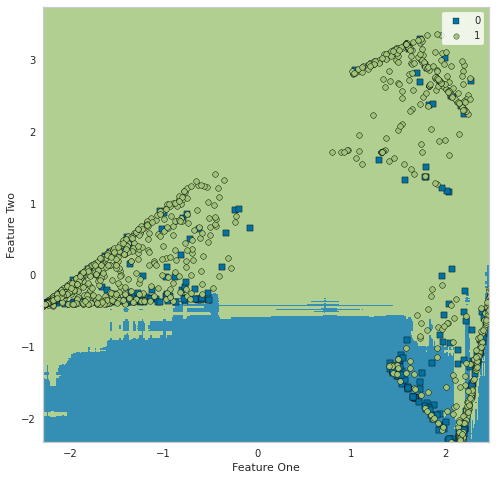

In [34]:
plt.figure(figsize=(8, 8))
plot_model(final_model, plot='boundary')

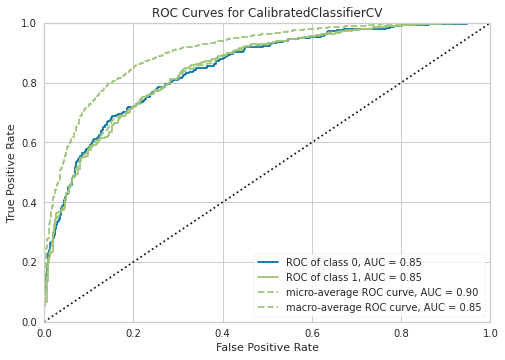

In [35]:
plot_model(final_model, plot='auc')

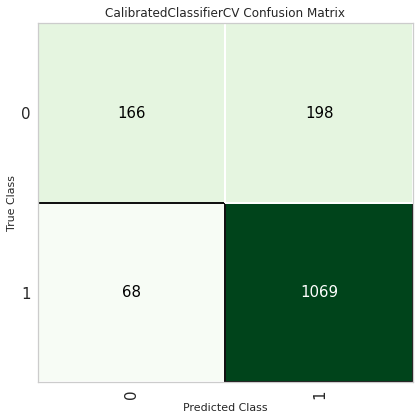

In [36]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='confusion_matrix')

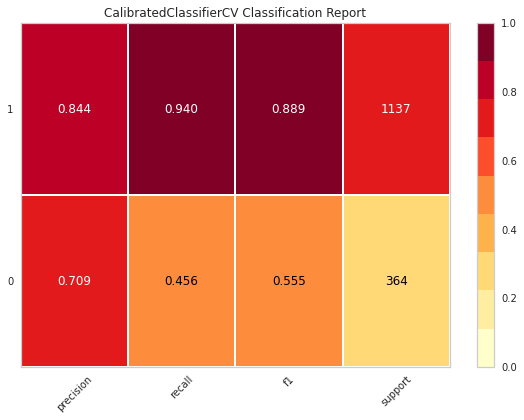

In [37]:
plt.figure(figsize=(8, 6))
plot_model(final_model, plot='class_report')

<hr style="border: solid 3px blue;">

# Document Similarity

![](https://miro.medium.com/max/897/0*hcWVsMExgGQJWpt1)

Picture Credit: https://miro.medium.com



For the same tea house review, find the most similar review in the dataset using cosine similarity.



## Centering the Vectors

**Sometimes people center document vectors when calculating similarities. That is, they calculate the mean vector from all documents, and they subtract this from each individual document's vector. Why do you think this could help with similarity metrics?**

<span style="color:Blue"> Answer:
    
> Sometimes your documents will already be fairly similar. For example, this data set is all reviews of businesses. There will be stong similarities between the documents compared to news articles, technical manuals, and recipes. You end up with all the similarities between 0.8 and 1 and no anti-similar documents (similarity < 0). When the vectors are centered, you are comparing documents within your dataset as opposed to all possible documents.

## Find the most similar review

Given an example review below, find the most similar document within the Yelp dataset using the **cosine similarity.**

> The cosine similarity refers to the degree of similarity between vectors measured using the cosine value of the angle between two vectors in the dot product space. When the angle is 0°, the cosine is 1, and the cosine of all other angles is less than 1. Therefore, this value is used for the purpose of judging the similarity of the direction rather than the magnitude of the vectors. If the directions of the two vectors are exactly the same, it is 1, if it forms an angle of 90°, it is 0, and if the direction is completely opposite, it is -1. have a value In this case, the size of the vector has no effect on the value. Cosine similarity is especially used in positive spaces where the result falls into the range [0,1].

In [38]:
review = """I absolutely love this place. The 360 degree glass windows with the 
Yerba buena garden view, tea pots all around and the smell of fresh tea everywhere 
transports you to what feels like a different zen zone within the city. I know 
the price is slightly more compared to the normal American size, however the food 
is very wholesome, the tea selection is incredible and I know service can be hit 
or miss often but it was on point during our most recent visit. Definitely recommend!

I would especially recommend the butternut squash gyoza."""

def cosine_similarity(a, b):
    return np.dot(a, b)/np.sqrt(a.dot(a)*b.dot(b))

review_vec = nlp(review).vector

## Center the document vectors
# Calculate the mean for the document vectors, should have shape (300,)
vec_mean = vectors.mean(axis=0)
# Subtract the mean from the vectors
centered = vectors - vec_mean

# Calculate similarities for each document in the dataset
# Make sure to subtract the mean from the review vector
sims = np.array([cosine_similarity(review_vec-vec_mean,vec) for vec in centered])

# Get the index for the most similar document
most_similar = sims.argmax()

In [39]:
print(review_data.iloc[most_similar].text)

We hired Kevin to help with a pipe that was botched by a landscaper.  He came over the same day and fixed it fairly quickly.  He is very knowledgable and honest and very reasonably priced.  He did a lot of major bathroom work for my sister also and she only has wonderful things to say about him.


Even though there are many different sorts of businesses in our Yelp dataset, you should have found another tea shop. 

## Looking at similar reviews

**If you look at other similar reviews, you'll see many coffee shops. Why do you think reviews for coffee are similar to the example review which mentions only tea?**

<span style="color:Blue"> Answer:
    
> Reviews for coffee shops will also be similar to our tea house review because coffee and tea are semantically similar. Most cafes serve both coffee and tea so you'll see the terms appearing together often.

<hr style="border: solid 3px blue;">